In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('happiness.csv' )
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [94]:
one_hot = pd.get_dummies(df['Region'])
df = df.drop(columns = ['Region'])
new_df = df.join(one_hot)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 22 columns):
Country                            157 non-null object
Happiness Rank                     157 non-null int64
Happiness Score                    157 non-null float64
Lower Confidence Interval          157 non-null float64
Upper Confidence Interval          157 non-null float64
Economy (GDP per Capita)           157 non-null float64
Family                             157 non-null float64
Health (Life Expectancy)           157 non-null float64
Freedom                            157 non-null float64
Trust (Government Corruption)      157 non-null float64
Generosity                         157 non-null float64
Dystopia Residual                  157 non-null float64
Australia and New Zealand          157 non-null uint8
Central and Eastern Europe         157 non-null uint8
Eastern Asia                       157 non-null uint8
Latin America and Caribbean        157 non-null uint8
Middle Eas

In [108]:
df = df.drop(columns = ['Country','Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval'])
new_df.corr()['Happiness Score'].sort_values(ascending=False)
# # Economy is the most positive correlated to Happiness Score (except lower and upper confidence interval) 
# and Sub-Saharan Africa is the most negative correlated (happiness rank is the same as happiness score which should be correlated 100%)

Happiness Score                    1.000000
Economy (GDP per Capita)           0.790322
Health (Life Expectancy)           0.765384
Family                             0.739252
Freedom                            0.566827
Dystopia Residual                  0.543738
Western Europe                     0.450081
Trust (Government Corruption)      0.402032
Latin America and Caribbean        0.268594
Australia and New Zealand          0.193772
North America                      0.186835
Generosity                         0.156848
Eastern Asia                       0.042385
Middle East and Northern Africa    0.001261
Central and Eastern Europe        -0.004808
Southeastern Asia                 -0.009382
Southern Asia                     -0.155446
Sub-Saharan Africa                -0.618585
Name: Happiness Score, dtype: float64

In [109]:
#new_df = df.drop(columns = ['Country','Lower Confidence Interval','Upper Confidence Interval','Happiness Rank'])
new_df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0,0,0,0,0,0,0,0,0,1
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0,0,0,0,0,0,0,0,0,1
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0,0,0,0,0,0,0,0,0,1
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,0,0,0,0,0,0,0,0,0,1
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,0,0,0,0,0,0,0,0,0,1


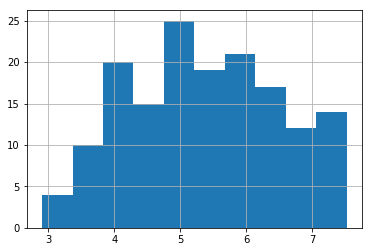

In [110]:
df['Happiness Score'].hist()
# not skewed, no transformation is needed.

In [179]:

#cor = input_data.corr()
#cor_target = abs(cor['Happiness Score'])
#relevant_features = cor_target[cor_target > 0.4]
#X = input_data[relevant_features.index].drop(columns = ['Happiness Score'], axis = 1)
#y = input_data['Happiness Score']
#relevant_features
#input_data = input_data[relevant_features.index]
#input_data.head()
#sns.pairplot(input_data)

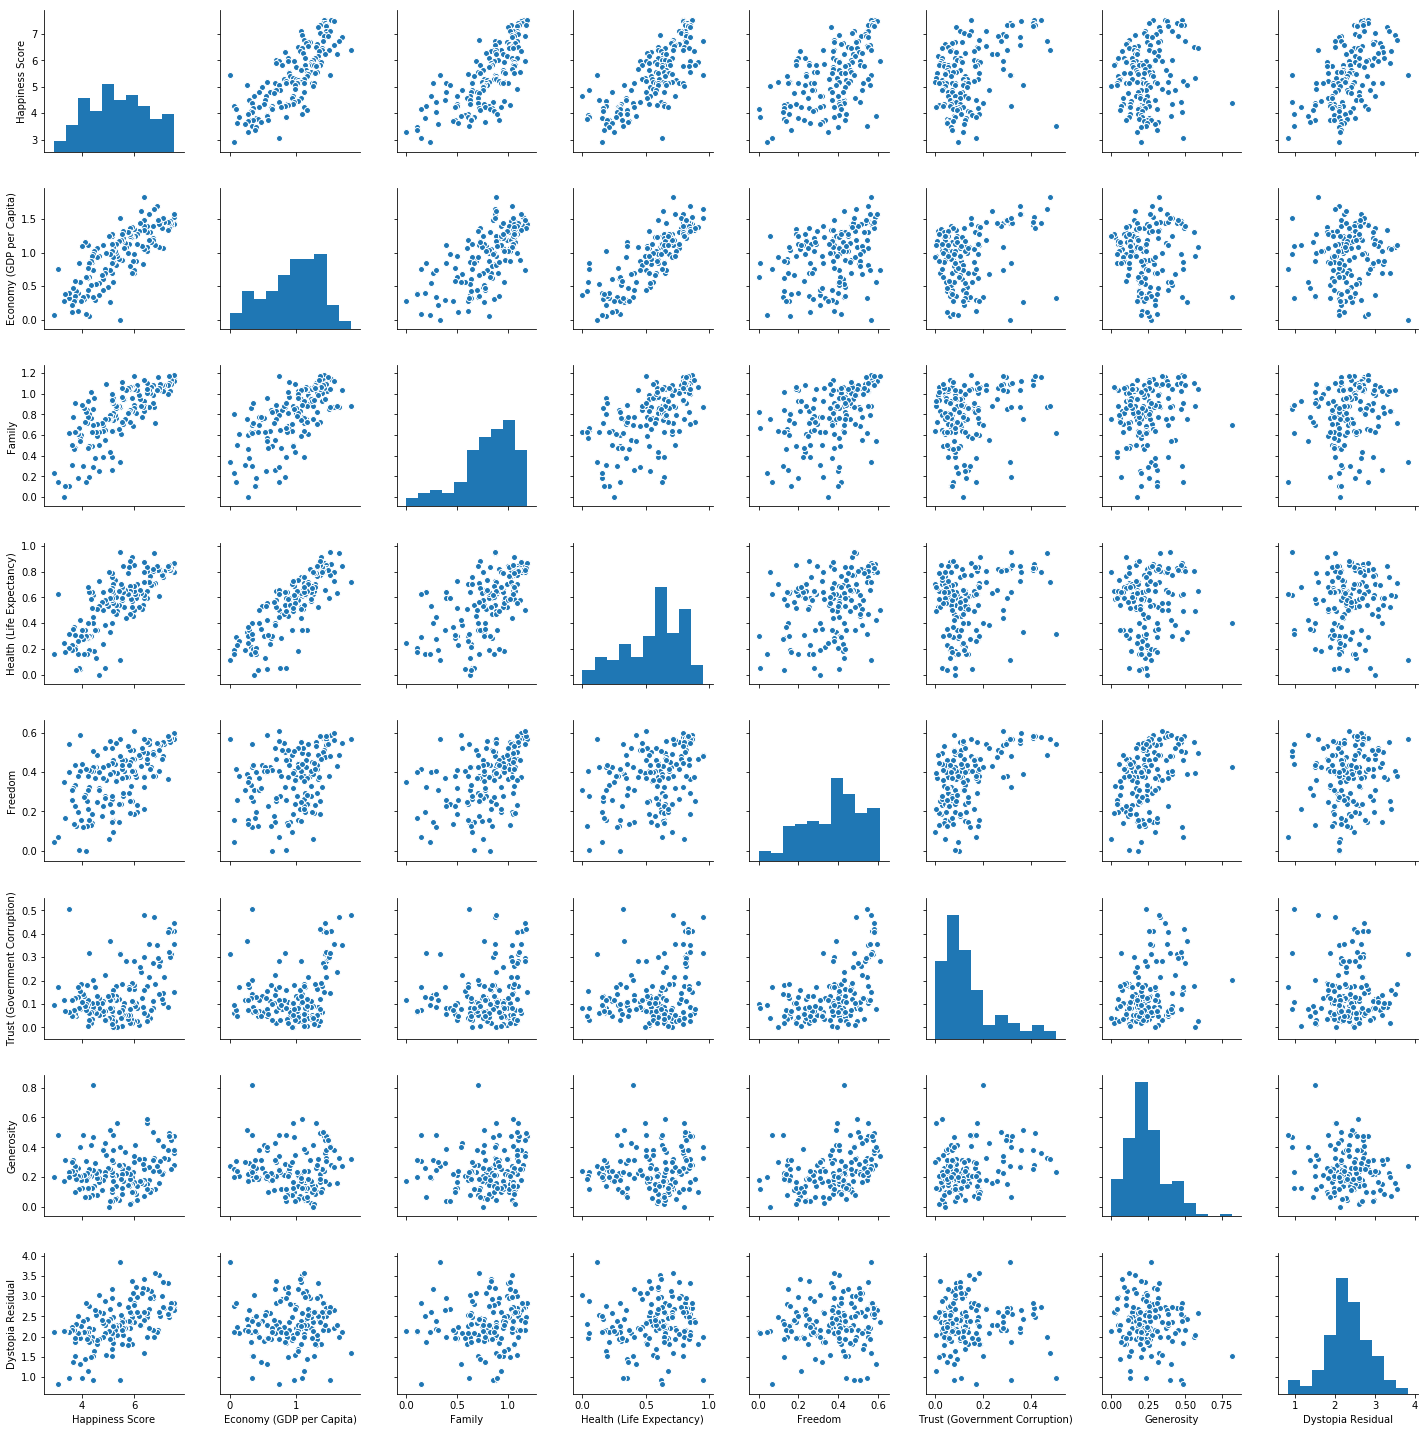

In [111]:
sns.pairplot(df)

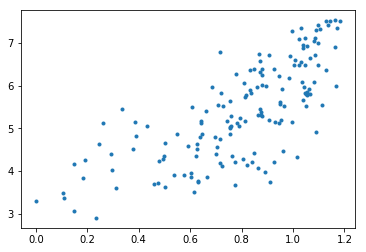

In [121]:
x = df['Family']
y = df['Happiness Score']
plt.plot(x,y,'.')

R^2: 0.5464928946987393


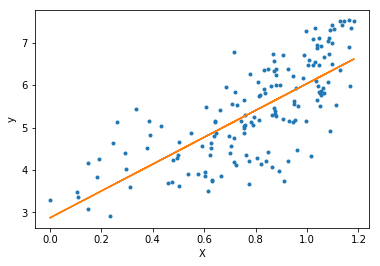

In [122]:
model = LinearRegression()
X = df['Family'][:,np.newaxis]
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X,y,'.', X, model.predict(X))
plt.xlabel('X')
plt.ylabel('y')
print("R^2:", model.score(X,y))

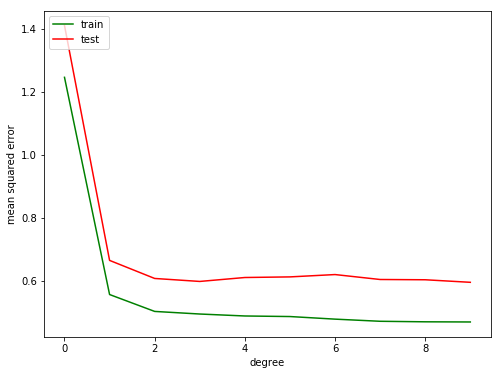

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

degrees = 10

train_error = []
test_error = []

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

#Degree 2 is the best that fits the data better than the linear modelth

In [158]:
poly = PolynomialFeatures(2)
poly.fit(new_df)
df_poly = poly.transform(new_df)
df_poly

array([[1.     , 7.526  , 1.44178, ..., 0.     , 0.     , 1.     ],
       [1.     , 7.509  , 1.52733, ..., 0.     , 0.     , 1.     ],
       [1.     , 7.501  , 1.42666, ..., 0.     , 0.     , 1.     ],
       ...,
       [1.     , 3.303  , 0.28123, ..., 1.     , 0.     , 0.     ],
       [1.     , 3.069  , 0.74719, ..., 0.     , 0.     , 0.     ],
       [1.     , 2.905  , 0.06831, ..., 1.     , 0.     , 0.     ]])

In [159]:
scaler = StandardScaler()
scaler.fit(df_poly)
X_scaled = scaler.transform(df_poly)
X_scaled

array([[ 0.        ,  1.88379206,  1.1862989 , ..., -0.56509091,
         0.        ,  2.54483604],
       [ 0.        ,  1.86885399,  1.39430839, ..., -0.56509091,
         0.        ,  2.54483604],
       [ 0.        ,  1.86182431,  1.14953556, ..., -0.56509091,
         0.        ,  2.54483604],
       ...,
       [ 0.        , -1.82700053, -1.63550608, ...,  1.76962678,
         0.        , -0.39295262],
       [ 0.        , -2.03261868, -0.50255339, ..., -0.56509091,
         0.        , -0.39295262],
       [ 0.        , -2.17672713, -2.15320779, ...,  1.76962678,
         0.        , -0.39295262]])

In [160]:
X = one_hot.join(pd.DataFrame(X_scaled))
X.head()

,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe,...,180,181,182,183,184,185,186,187,188,189
0,0,0,0,0,0,0,0,0,0,1,...,-0.246598,0.0,0.0,0.0,-0.216025,0.0,0.0,-0.565091,0.0,2.544836
1,0,0,0,0,0,0,0,0,0,1,...,-0.246598,0.0,0.0,0.0,-0.216025,0.0,0.0,-0.565091,0.0,2.544836
2,0,0,0,0,0,0,0,0,0,1,...,-0.246598,0.0,0.0,0.0,-0.216025,0.0,0.0,-0.565091,0.0,2.544836
3,0,0,0,0,0,0,0,0,0,1,...,-0.246598,0.0,0.0,0.0,-0.216025,0.0,0.0,-0.565091,0.0,2.544836
4,0,0,0,0,0,0,0,0,0,1,...,-0.246598,0.0,0.0,0.0,-0.216025,0.0,0.0,-0.565091,0.0,2.544836


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 99)
model = LinearRegression()
model.fit(X_train, y_train)         
print(model.score(X_test, y_test))

0.9982604173552827


In [169]:
df = pd.read_csv('happiness.csv')
one_hot = pd.get_dummies(df['Region'])
#one_hot_athletic = pd.get_dummies(df['Country'])
df = df.join(one_hot)

y = df['Happiness Score']
numerical = df.drop(columns = ['Region', 'Country', 'Happiness Score','Lower Confidence Interval','Upper Confidence Interval'])

model = make_pipeline(PolynomialFeatures(2), StandardScaler())
model.fit(numerical)
X = one_hot.join(pd.DataFrame(model.transform(numerical)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 99)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9998595142889369


In [172]:
df = pd.read_csv('happiness.csv')
one_hot = pd.get_dummies(df['Region'])
#one_hot_athletic = pd.get_dummies(df['Country'])
df = df.join(one_hot)

y = df['Happiness Score']
numerical = df.drop(columns = ['Region', 'Country', 'Happiness Score','Lower Confidence Interval','Upper Confidence Interval'])

model = make_pipeline(PolynomialFeatures(2), StandardScaler())
model.fit(numerical)
X = one_hot.join(pd.DataFrame(model.transform(numerical)))

model = RidgeCV(cv=10, alphas=[0.0001, 0.1, 1])
model.fit(X, y)
print(model.score(X, y))

0.9999124884416273


In [173]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('Mean Squared Error')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    model = Ridge(alpha=alpha, fit_intercept=True, random_state=0)
    
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # print errors as report
    print('alpha: {:6} | MSE scores: {} | Average MSE: {:.6}'.
          format(alpha,
                 -scores,
                 np.mean(-scores)))
# 0.001 has the smallest MSE scores here

Mean Squared Error
----------------------------------------------------------------------------
alpha:  0.001 | MSE scores: [2.57725811e-02 1.16506178e-03 4.73765875e-04 9.77180601e-05
 7.92736002e-04] | Average MSE: 0.00566037
alpha:   0.01 | MSE scores: [0.01645995 0.00107211 0.0003053  0.00022131 0.00188988] | Average MSE: 0.00398971
alpha:    0.1 | MSE scores: [0.00809719 0.00079864 0.00026336 0.00030322 0.00428195] | Average MSE: 0.00274887
alpha:      1 | MSE scores: [0.00411312 0.00046601 0.0006265  0.00037106 0.02110385] | Average MSE: 0.00533611
alpha:     10 | MSE scores: [0.00199303 0.00110665 0.00194925 0.00452881 0.08591662] | Average MSE: 0.0190989


In [175]:
model = Ridge(alpha=0.001, fit_intercept=True, random_state=0)

scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print('R2 test error', np.mean(scores))

R2 test error 0.946647837720314


In [184]:
model = Ridge(alpha=0.1, fit_intercept=True, random_state=0)
model.fit(X,y)
model.coef_
print(model.intercept_)
print(model.coef_)

5.38411341224156
[ 0.00041811  0.00317749  0.00072392  0.00470529 -0.00049281  0.00041983
  0.00049505 -0.00046371 -0.01865287  0.00966971  0.         -0.10304116
  0.12301019  0.1065232   0.07291353  0.07334623  0.02777685  0.0227917
  0.18547444  0.00372827  0.00818803  0.00377597  0.0130754  -0.00151101
  0.00374361  0.0021296  -0.00224675 -0.04354919  0.02840756 -0.07465381
  0.03735521  0.02729272  0.01333701  0.00828272  0.0101808   0.02750034
  0.09262317  0.00239015 -0.03780245 -0.01648665 -0.02635381 -0.02578802
  0.00272855 -0.026449   -0.01866669 -0.01125434 -0.02147574  0.04909406
  0.03831328  0.03241411  0.01984037  0.0189481   0.03370531  0.11887195
  0.00304968  0.02123723  0.00875168  0.02262648  0.02776437  0.00369058
  0.01618734  0.01017625  0.02197691  0.01793577  0.02120563  0.03052062
 -0.00056498  0.01351301  0.01031563  0.08194528  0.00440354  0.01181304
  0.00673995  0.01244476  0.00881051  0.00379358  0.0080941   0.00976931
  0.02086105  0.0203289   0.0228423

In [192]:
print(len(model.coef_), X.shape)
X.columns

200 (157, 200)


Index([      'Australia and New Zealand',      'Central and Eastern Europe',
                          'Eastern Asia',     'Latin America and Caribbean',
       'Middle East and Northern Africa',                   'North America',
                     'Southeastern Asia',                   'Southern Asia',
                    'Sub-Saharan Africa',                  'Western Europe',
       ...
                                     180,                               181,
                                     182,                               183,
                                     184,                               185,
                                     186,                               187,
                                     188,                               189],
      dtype='object', length=200)

In [ ]:
# My equation:
# Happy Score = 5.38411341224156 + 0.00041811*Australia and New Zealand + 0.00317749*Central and Eastern Europe
# + 0.00072392*Eastern Asia + 0.00470529*Latin America and Caribbean....

In [199]:
print(f"R^2 of Train: {model.score(X_train,y_train)}")
print(f"Adjusted R^2 of Train: {1 - (1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}")
print('R^2 of Train:',model.score(X,y))


#print(f"R^2 of Test: {model.score(X_test,y_test)}")
#print(f"Adjusted R^2 of Test: {1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}")
#print(f"MSE of Test: {np.mean(model.fit(X_test,y_test).steps[1][1].cv_values_,axis = 0)[0]}")

R^2 of Train: 0.9999841850546772
Adjusted R^2 of Train: 1.0000185653705962
R^2 of Train: 0.9998791771967118
